In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                     Dropout, BatchNormalization)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os


In [25]:
#Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/kaggle/input/image-classification/images/images',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/kaggle/input/image-classification/validation/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 35093 files belonging to 4 classes.
Found 122 files belonging to 4 classes.


In [4]:
#normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
#CNN MODEL BUILDING
Model = Sequential()

Model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu' ))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

Model.add(Flatten())

Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(64, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(4, activation='softmax'))

In [12]:
Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,388 (56.64 MB)

 Trainable params: 14,847,940 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
Model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [23]:
Model.fit(train_ds, epochs=9, validation_data=validation_ds)

Epoch 1/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 68ms/step - accuracy: 0.9826 - loss: 0.0571 - val_accuracy: 0.8033 - val_loss: 1.1988
Epoch 2/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.8033 - val_loss: 1.1414
Epoch 3/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.7787 - val_loss: 3.1890
Epoch 4/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.7623 - val_loss: 2.0062
Epoch 5/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.7213 - val_loss: 1.9346
Epoch 6/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9928 - loss: 0.0227 - val_accuracy: 0.7951 - val_loss: 3.2165
Epoch 7/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9917 - loss: 0.0287 - val_accuracy: 0.8033 - val_loss: 1.7257
Epoch 8/9
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9924 - loss: 0

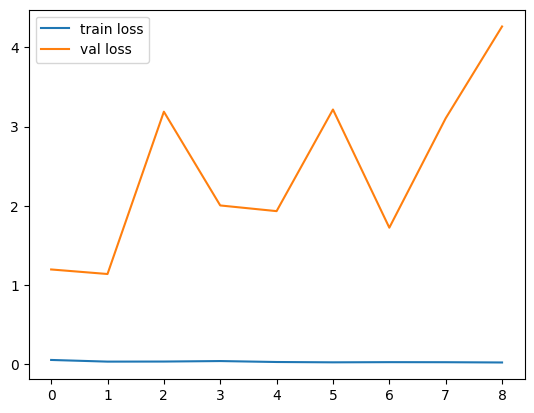

In [24]:
import matplotlib.pyplot as plt
plt.plot(Model.history.history['loss'], label='train loss')
plt.plot(Model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

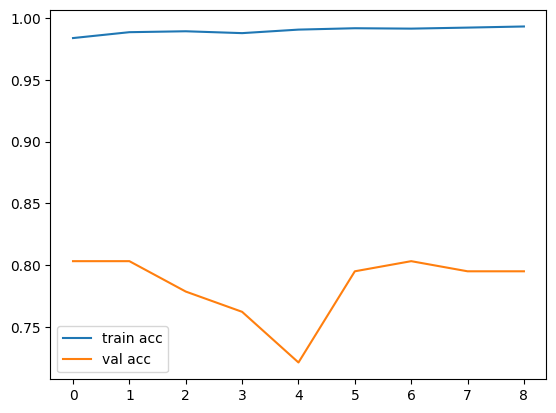

In [26]:
plt.plot(Model.history.history['accuracy'], label='train acc')
plt.plot(Model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [43]:
import cv2
import numpy as np

# Load image using OpenCV
img_path = '/kaggle/input/image-classification/images/images/food and d rinks/0FoxSkMXWsyYKN5EqzXC.jpg'  # Change as needed
img = cv2.imread(img_path)


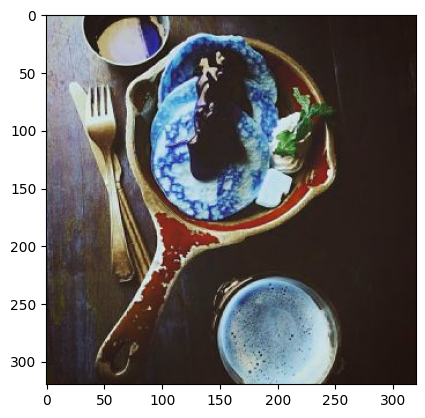

In [44]:
plt.imshow(img)

In [45]:

img_resized = cv2.resize(img, (256, 256))

test_input = img_resized.reshape((1,256,256,3))


In [46]:
Model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0., 1., 0., 0.]], dtype=float32)

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/image-classification/images/images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',      # if your labels are integers (0,1,2,3)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/image-classification/images/images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 28075 images belonging to 4 classes.
Found 7018 images belonging to 4 classes.


In [49]:
#normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_generator = train_ds.map(process)
validation_generator = validation_ds.map(process)

In [50]:
#CNN MODEL BUILDING
Model = Sequential()

Model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu' ))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

Model.add(Flatten())

Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(64, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(4, activation='softmax'))

In [51]:
Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,388 (56.64 MB)

 Trainable params: 14,847,940 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [52]:
Model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [53]:
Model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - accuracy: 0.5776 - loss: 3.2281 - val_accuracy: 0.6639 - val_loss: 0.9448
Epoch 2/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 68ms/step - accuracy: 0.8061 - loss: 0.5231 - val_accuracy: 0.5164 - val_loss: 1.9169
Epoch 3/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 68ms/step - accuracy: 0.8517 - loss: 0.4012 - val_accuracy: 0.8033 - val_loss: 0.4803
Epoch 4/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.8754 - loss: 0.3540 - val_accuracy: 0.7623 - val_loss: 0.6022
Epoch 5/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9004 - loss: 0.2771 - val_accuracy: 0.6557 - val_loss: 1.6867
Epoch 6/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9185 - loss: 0.2314 - val_accuracy: 0.7049 - val_loss: 1.8712
Epoch 7/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9411 - loss: 0.1680 - val_accuracy: 0.7541 - val_loss: 1.7264
Epoch 8/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step - accuracy: 0.9488 -

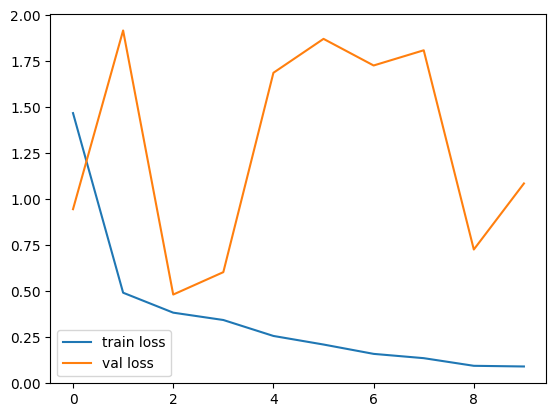

In [54]:
import matplotlib.pyplot as plt
plt.plot(Model.history.history['loss'], label='train loss')
plt.plot(Model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

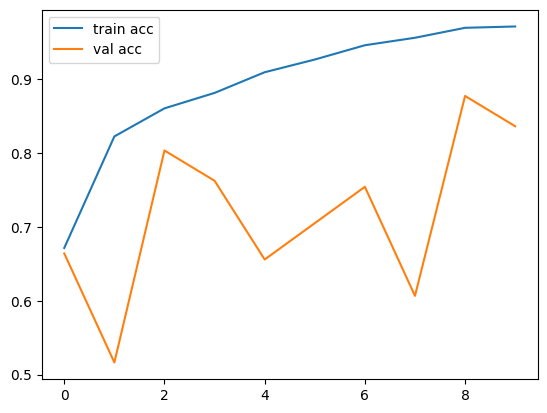

In [55]:
plt.plot(Model.history.history['accuracy'], label='train acc')
plt.plot(Model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',    # you can also use 'val_loss'
    patience=5,                # number of epochs with no improvement after which training will stop
    restore_best_weights=True  # restore model weights from the epoch with best value
)

history = Model.fit(
    train_generator,                  # your training data
    validation_data=val_generator,    # your validation data
    epochs=30,                 # max number of epochs
    callbacks=[early_stop]
)


Epoch 1/30
1096/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9784 - loss: 0.0701

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 115s 105ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.9651 - val_loss: 0.1313
Epoch 2/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 110s 101ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9514 - val_loss: 0.1597
Epoch 3/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 111s 101ms/step - accuracy: 0.9787 - loss: 0.0688 - val_accuracy: 0.7268 - val_loss: 5.3513
Epoch 4/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 110s 100ms/step - accuracy: 0.9868 - loss: 0.0473 - val_accuracy: 0.9789 - val_loss: 0.0706
Epoch 5/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 112s 102ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.9892 - val_loss: 0.0558
Epoch 6/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 113s 103ms/step - accuracy: 0.9853 - loss: 0.0505 - val_accuracy: 0.9490 - val_loss: 0.1562
Epoch 7/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 111s 101ms/step - accuracy: 0.9862 - loss: 0.0448 - val_accuracy: 0.9514 - val_loss: 0.1694
Epoch 8/30
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 110s 101ms/step - accuracy: 0.9

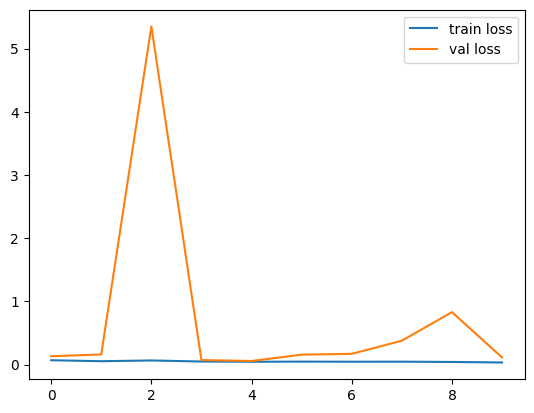

In [58]:
import matplotlib.pyplot as plt
plt.plot(Model.history.history['loss'], label='train loss')
plt.plot(Model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

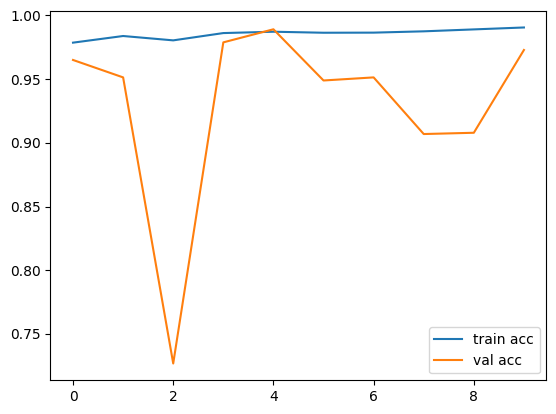

In [59]:
plt.plot(Model.history.history['accuracy'], label='train acc')
plt.plot(Model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [126]:
import cv2
import numpy as np

# Load image using OpenCV
img_path = '/kaggle/input/testdatadet/penne-pasta-resize-3.jpg'  # Change as needed
img = cv2.imread(img_path)


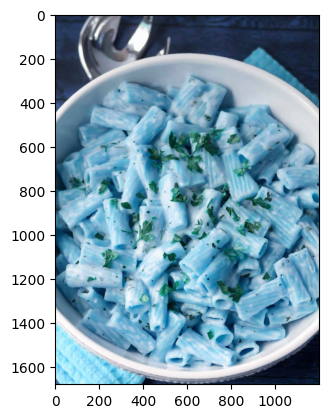

In [127]:
plt.imshow(img)

In [128]:

img_resized = cv2.resize(img, (256, 256))

test_input = img_resized.reshape((1,256,256,3))


In [129]:
Model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0., 0., 1., 0.]], dtype=float32)